In [0]:
import os
import numpy as np

from skimage.io import imsave, imread



In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data_path = "/content/drive/My Drive"


In [6]:
cd /content/drive/My Drive

/content/drive/My Drive


In [8]:


image_rows = 192
image_cols = 256


def create_train_data():
    train_data_path = os.path.join(data_path, 'train')
    images = sorted(os.listdir(train_data_path))
    total = len(images) // 2

    imgs = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)
    imgs_mask = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)

    i = 0
    print('-'*30)
    print('Creating training images...')
    print('-'*30)
    for image_name in images:
        if 'mask' in image_name:
          continue
        image_mask_name = image_name.split('.')[0] + '_mask.jpg'
        # image_mask_name = image_name.split('.')[0] + '_segmentation.png'
        # print(image_mask_name)
        img = imread(os.path.join(train_data_path, image_name), as_gray=True)
        img_mask = imread(os.path.join(train_data_path, image_mask_name), as_gray=True)

        img = np.array([img])
        img_mask = np.array([img_mask])

        imgs[i] = img
        imgs_mask[i] = img_mask

        if i % 100 == 0:
            print('Done: {0}/{1} images'.format(i, total))
        i += 1
    print('Loading done.')

    np.save('imgs_train.npy', imgs)
    np.save('imgs_mask_train.npy', imgs_mask)
    print('Saving to .npy files done.')


def load_train_data():
    imgs_train = np.load('imgs_train.npy')
    imgs_mask_train = np.load('imgs_mask_train.npy')
    return imgs_train, imgs_mask_train


def create_test_data():
    test_data_path = os.path.join(data_path, 'test')
    images = sorted(os.listdir(test_data_path))
    total = len(images) // 2

    imgs = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)
    imgs_mask = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)
    imgs_id = np.ndarray((total, ), dtype=np.int32)

    i = 0
    print('-'*30)
    print('Creating testing images...')
    print('-'*30)
    for image_name in images:
        if 'mask' in image_name:
            continue
        image_mask_name = image_name.split('.')[0] + '_mask.jpg'
        #image_mask_name = image_name.split('.')[0] + '_segmentation.png'
        img_id = int((image_name.split('.')[0]))
        img = imread(os.path.join(test_data_path, image_name), as_gray=True)
        img_mask = imread(os.path.join(test_data_path, image_mask_name), as_gray=True)

        img = np.array([img])
        img_mask = np.array([img_mask])

        imgs[i] = img
        imgs_mask[i] = img_mask
        imgs_id[i] = img_id

        if i % 10 == 0:
            print('Done: {0}/{1} images'.format(i, total))
        i += 1
    print('Loading done.')

    np.save('imgs_test.npy', imgs)
    np.save('imgs_mask_test.npy', imgs_mask)
    np.save('imgs_id_test.npy', imgs_id)
    print('Saving to .npy files done.')


def load_test_data():
    imgs_test = np.load('imgs_test.npy')
    imgs_mask_test = np.load('imgs_mask_test.npy')
    imgs_id = np.load('imgs_id_test.npy')
    return imgs_test, imgs_id, imgs_mask_test

if __name__ == '__main__':
    create_train_data()
    create_test_data()


------------------------------
Creating training images...
------------------------------
Done: 0/2000 images
Done: 100/2000 images
Done: 200/2000 images
Done: 300/2000 images
Done: 400/2000 images
Done: 500/2000 images
Done: 600/2000 images
Done: 700/2000 images
Done: 800/2000 images
Done: 900/2000 images
Done: 1000/2000 images
Done: 1100/2000 images
Done: 1200/2000 images
Done: 1300/2000 images
Done: 1400/2000 images
Done: 1500/2000 images
Done: 1600/2000 images
Done: 1700/2000 images
Done: 1800/2000 images
Done: 1900/2000 images
Loading done.
Saving to .npy files done.
------------------------------
Creating testing images...
------------------------------
Done: 0/600 images
Done: 10/600 images
Done: 20/600 images
Done: 30/600 images
Done: 40/600 images
Done: 50/600 images
Done: 60/600 images
Done: 70/600 images
Done: 80/600 images
Done: 90/600 images
Done: 100/600 images
Done: 110/600 images
Done: 120/600 images
Done: 130/600 images
Done: 140/600 images
Done: 150/600 images
Done: 1

------------------------------
Loading and preprocessing train data...
------------------------------


/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


------------------------------
Loading and preprocessing test data...
------------------------------
------------------------------
Creating and compiling model...
------------------------------
------------------------------
Fitting model...
------------------------------
Train on 2000 samples, validate on 600 samples
Epoch 1/50
2000/2000 [==============================] - 132s 66ms/step - loss: 0.6424 - iou: 0.9978 - similarity: 0.1314 - dice_coef: 0.2278 - val_loss: 0.5711 - val_iou: 0.9981 - val_similarity: 0.1295 - val_dice_coef: 0.2256
Epoch 2/50
2000/2000 [==============================] - 130s 65ms/step - loss: 0.4401 - iou: 0.9987 - similarity: 0.1450 - dice_coef: 0.2420 - val_loss: 0.4667 - val_iou: 0.9985 - val_similarity: 0.2139 - val_dice_coef: 0.3463
Epoch 3/50
2000/2000 [==============================] - 130s 65ms/step - loss: 0.3867 - iou: 0.9988 - similarity: 0.1879 - dice_coef: 0.3088 - val_loss: 0.4617 - val_iou: 0.9986 - val_similarity: 0.2172 - val_dice_coef: 0.351

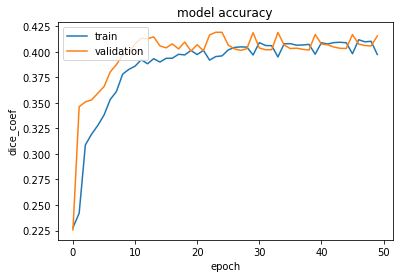

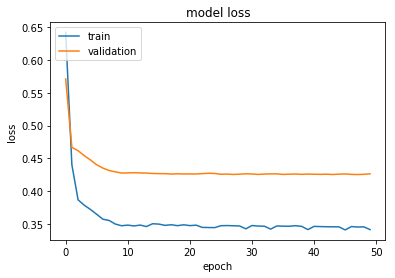

------------------------------
Loading saved weights...
------------------------------
------------------------------
Predicting masks on test data...
------------------------------
600/600 [==============================] - 23s 39ms/step
------------------------------
Saving predicted masks to files...
------------------------------


In [10]:
from __future__ import print_function

import os
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
from keras.models import Model
from keras.layers import Input, concatenate, Conv2D, Conv2DTranspose
from keras.layers import MaxPooling2D,Convolution2D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from keras.models import load_model
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.noise import GaussianNoise

#from data import load_train_data, load_test_data

K.clear_session()
K.set_image_data_format('channels_last')  # TF dimension ordering in this code

img_rows = 256
img_cols = 256

smooth = 1e-5


def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def similarity(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(K.abs(y_true_f * y_pred_f))
    return ((intersection) / (K.sum(K.abs(y_true_f)+ K.abs(y_pred_f)) - intersection))


def jaccard_distance(y_true, y_pred, smooth=100):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    sum_ = K.sum(K.square(y_true), axis = -1) + K.sum(K.square(y_pred), axis=-1)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return (1 - jac)
  
def iou(y_true, y_pred, smooth = 100):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    sum_ = K.sum(K.square(y_true), axis = -1) + K.sum(K.square(y_pred), axis=-1)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return jac
  

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)


def get_unet():
    inputs = Input((img_rows, img_cols, 1))
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(conv5)

    up6 = concatenate([Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(conv5), conv4])
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv6), conv3])
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv7), conv2])
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv8), conv1])
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    model = Model(inputs=[inputs], outputs=[conv10])

   # model.load_weights('weights.h5')

    model.compile(optimizer=Adam(lr=1e-5), loss='binary_crossentropy', metrics=[iou, similarity, dice_coef])

    return model






def preprocess(imgs):
    imgs_p = np.ndarray((imgs.shape[0], img_rows, img_cols), dtype=np.uint8)
    for i in range(imgs.shape[0]):
        imgs_p[i] = resize(imgs[i], (img_cols, img_rows), preserve_range=True)

    imgs_p = imgs_p[..., np.newaxis]
    return imgs_p


def train_and_predict():
    print('-'*30)
    print('Loading and preprocessing train data...')
    print('-'*30)
    imgs_train, imgs_mask_train = load_train_data()

    imgs_train = preprocess(imgs_train)
    imgs_mask_train = preprocess(imgs_mask_train)

    imgs_train = imgs_train.astype('float32')
    mean = np.mean(imgs_train)  # mean for data centering
    std = np.std(imgs_train)  # std for data normalization

    imgs_train -= mean
    imgs_train /= std

    imgs_mask_train = imgs_mask_train.astype('float32')
    imgs_mask_train /= 255.  # scale masks to [0, 1]

    print('-'*30)
    print('Loading and preprocessing test data...')
    print('-'*30)
    imgs_test, imgs_id_test, imgs_mask_test = load_test_data()

    imgs_test = preprocess(imgs_test)
    imgs_mask_test = preprocess(imgs_mask_test)

    imgs_test = imgs_test.astype('float32')
    imgs_test -= mean
    imgs_test /= std

    imgs_mask_test = imgs_mask_test.astype('float32')
    imgs_mask_test /= 255.  # scale masks to [0, 1]


    print('-'*30)
    print('Creating and compiling model...')
    print('-'*30)
    model = get_unet()
    model_checkpoint = ModelCheckpoint('weights.h5', monitor='val_loss', save_best_only=True)

    print('-'*30)
    print('Fitting model...')
    print('-'*30)
    history=model.fit(imgs_train, imgs_mask_train, batch_size=8, epochs=50, verbose=1, shuffle=False,
              validation_data=(imgs_test, imgs_mask_test),
              callbacks=[model_checkpoint])
    

    # list all data in history
    print(history.history.keys())

    plt.plot(history.history['dice_coef'])
    plt.plot(history.history['val_dice_coef'])
    plt.title('model accuracy')
    plt.ylabel('dice_coef')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    print('-'*30)
    print('Loading saved weights...')
    print('-'*30)
    # model.load_weights('weights.h5')

    print('-'*30)
    print('Predicting masks on test data...')
    print('-'*30)
    imgs_mask_test_pred = model.predict(imgs_test, verbose=1)
    # np.save('imgs_mask_test.npy', imgs_mask_test_pred)

    print('-' * 30)
    print('Saving predicted masks to files...')
    print('-' * 30)
    pred_dir = 'preds'
    if not os.path.exists(pred_dir):
        os.mkdir(pred_dir)
    for image, image_id in zip(imgs_mask_test_pred, imgs_id_test):
        image = (image[:, :, 0] * 255.).astype(np.uint8)
        imsave(os.path.join(pred_dir, str(image_id) + '_pred.png'), image)

if __name__ == '__main__':
    train_and_predict()


In [0]:
 plt.plot(history.history['iou'])
    plt.plot(history.history['val_iou'])
    plt.title('Intersection Over Union')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()